<div>
    <h3>Quick report of life and death</h3>
    <h4>Source</h4>
    <div>git pull https://github.com/CSSEGISandData/COVID-19.git</div>
    <div>Country comparison of sum and rolling increase of reported cases and death.</div>
</div>

In [49]:
import pandas as pd
import datetime as dtt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.shape

(264, 85)

In [91]:
country = df.loc[df['Country/Region'].str.contains('United Kingdom|China')].groupby('Country/Region').sum()
country.drop(['Lat','Long'], axis = 1, inplace = True)
country = country.T
country['ChinaDaily'] = country[['China']].diff(axis = 0, periods = 1)
country['UKDaily'] = country[['United Kingdom']].diff(axis = 0, periods = 1)

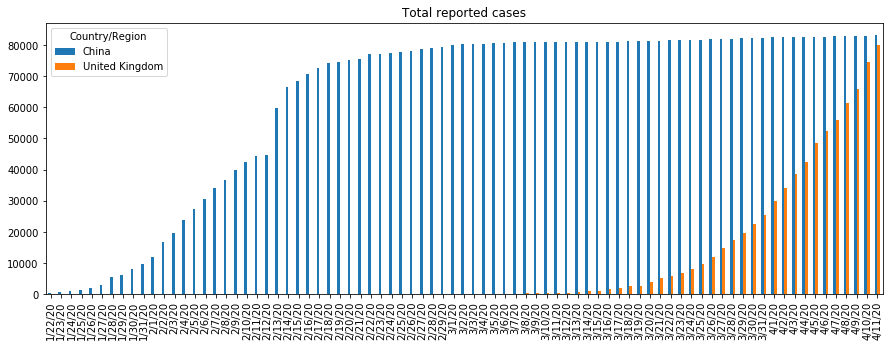

In [84]:
country[['China','United Kingdom']].plot(kind ='bar', figsize = (15,5), title = 'Total reported cases')

In [93]:
death = pd.read_csv('time_series_covid19_deaths_global.csv')
countryD = death.loc[death['Country/Region'].str.contains('China|United Kingdom')].groupby\
('Country/Region').sum()

In [94]:
countryD.drop(['Lat','Long'], axis = 1, inplace = True)
countryD = countryD.T
countryD['ChinaDaily'] = countryD[['China']].diff(axis = 0, periods = 1)
countryD['UKDaily'] = countryD[['United Kingdom']].diff(axis = 0, periods = 1)

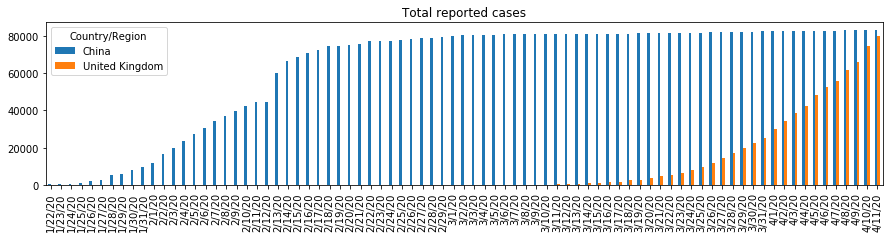

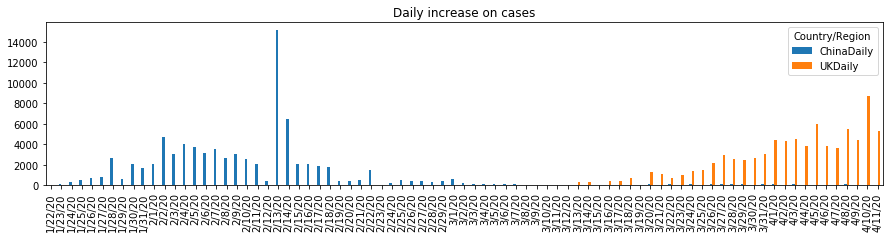

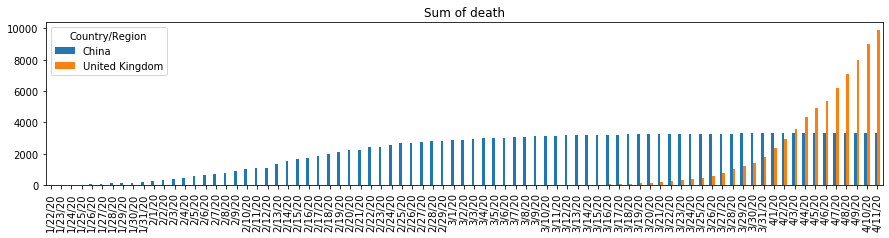

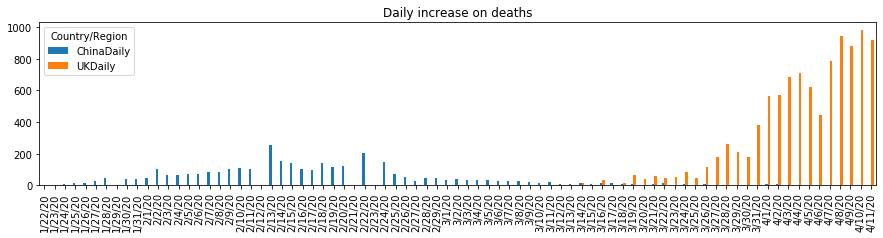

In [98]:
country[['China','United Kingdom']].plot(kind ='bar', figsize = (15,3), title = 'Total reported cases');
country[['ChinaDaily','UKDaily']].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on cases');
countryD[['China','United Kingdom']].plot(kind='bar', figsize = (15,3), title = 'Sum of death');
countryD[['ChinaDaily','UKDaily']].plot(kind ='bar', figsize = (15,3), title = 'Daily increase on deaths');

In [105]:
print('Total reported cases/报告病例总数')
country[-1:]

Total reported cases/报告病例总数


Country/Region,China,United Kingdom,ChinaDaily,UKDaily
4/11/20,83014,79874,73.0,5269.0


In [106]:
print('Total reported Deaths/报告死亡总数')
countryD[-1:]

Total reported Deaths/报告死亡总数


Country/Region,China,United Kingdom,ChinaDaily,UKDaily
4/11/20,3343,9892,3.0,918.0
